In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("monthly-milk-production.csv")
df.head()

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            168 non-null    object 
 1   Milk Production  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [4]:
df.describe()

,Milk Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [5]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Month            168 non-null    datetime64[ns]
 1   Milk Production  168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [6]:
df.head()

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


In [7]:
#Renaming Milk production column
df.rename(columns = {'Milk Production': 'Milk_Production'}, inplace = True)
df.head()

,Month,Milk_Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


In [8]:
#Define X and Y
X = df.drop(['Milk_Production'], axis = 1)
y = df['Milk_Production']

In [9]:
#renaming the column as desired by prophet library
df.columns = ["ds", "y"]
df.head()

,ds,y
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


<AxesSubplot:xlabel='ds', ylabel='y'>

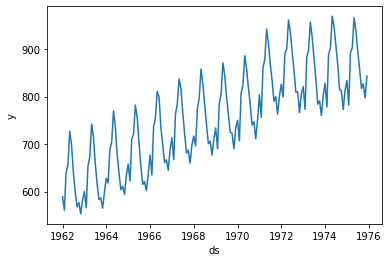

In [10]:
sns.lineplot(data = df, x = 'ds', y ='y')



In [31]:
#instantiate Prophet()
model = Prophet()
model.fit(df)
model

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
#making a future dataframe for predicting
future = model.make_future_dataframe(periods = 365)
future

,ds
0,1962-01-01 01:00:00
1,1962-02-01 01:00:00
2,1962-03-01 01:00:00
3,1962-04-01 01:00:00
4,1962-05-01 01:00:00
...,...
528,1976-11-26 01:00:00
529,1976-11-27 01:00:00
530,1976-11-28 01:00:00
531,1976-11-29 01:00:00


In [13]:

df.tail()

,ds,y
163,1975-08-01 01:00:00,858.0
164,1975-09-01 01:00:00,817.0
165,1975-10-01 01:00:00,827.0
166,1975-11-01 01:00:00,797.0
167,1975-12-01 01:00:00,843.0


In [14]:
future.tail()

,ds
528,1976-11-26 01:00:00
529,1976-11-27 01:00:00
530,1976-11-28 01:00:00
531,1976-11-29 01:00:00
532,1976-11-30 01:00:00


In [15]:
#making a prediction
pred = model.predict(future)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01 01:00:00,606.933493,577.562527,597.538427,606.933493,606.933493,-20.143484,-20.143484,-20.143484,-20.143484,-20.143484,-20.143484,0.0,0.0,0.0,586.790009
1,1962-02-01 01:00:00,608.652361,537.029613,556.009693,608.652361,608.652361,-62.573509,-62.573509,-62.573509,-62.573509,-62.573509,-62.573509,0.0,0.0,0.0,546.078852
2,1962-03-01 01:00:00,610.204887,631.249867,651.120918,610.204887,610.204887,31.380826,31.380826,31.380826,31.380826,31.380826,31.380826,0.0,0.0,0.0,641.585713
3,1962-04-01 01:00:00,611.923754,648.952844,668.126822,611.923754,611.923754,46.712932,46.712932,46.712932,46.712932,46.712932,46.712932,0.0,0.0,0.0,658.636686
4,1962-05-01 01:00:00,613.587175,711.862482,731.609025,613.587175,613.587175,108.047029,108.047029,108.047029,108.047029,108.047029,108.047029,0.0,0.0,0.0,721.634204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1976-11-26 01:00:00,875.238690,804.085730,826.451086,870.649246,879.671131,-59.787892,-59.787892,-59.787892,-59.787892,-59.787892,-59.787892,0.0,0.0,0.0,815.450798
529,1976-11-27 01:00:00,875.257199,806.722048,829.430242,870.648462,879.704703,-56.653844,-56.653844,-56.653844,-56.653844,-56.653844,-56.653844,0.0,0.0,0.0,818.603355
530,1976-11-28 01:00:00,875.275708,810.103369,833.477372,870.653382,879.747125,-53.338663,-53.338663,-53.338663,-53.338663,-53.338663,-53.338663,0.0,0.0,0.0,821.937045
531,1976-11-29 01:00:00,875.294217,814.471067,836.807376,870.651984,879.790452,-49.903573,-49.903573,-49.903573,-49.903573,-49.903573,-49.903573,0.0,0.0,0.0,825.390644


In [16]:
#Creating desired columns
pred[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01 01:00:00,586.790009,577.562527,597.538427
1,1962-02-01 01:00:00,546.078852,537.029613,556.009693
2,1962-03-01 01:00:00,641.585713,631.249867,651.120918
3,1962-04-01 01:00:00,658.636686,648.952844,668.126822
4,1962-05-01 01:00:00,721.634204,711.862482,731.609025


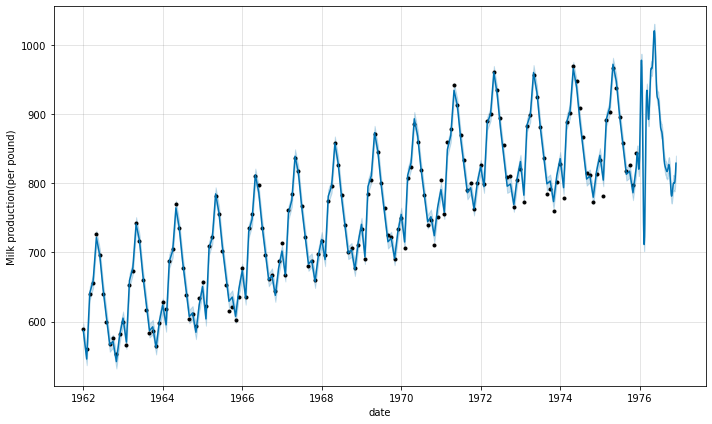

In [18]:
#using Prophet to plot the prediction
model.plot(pred, xlabel = "date",ylabel ="Milk production(per pound)");

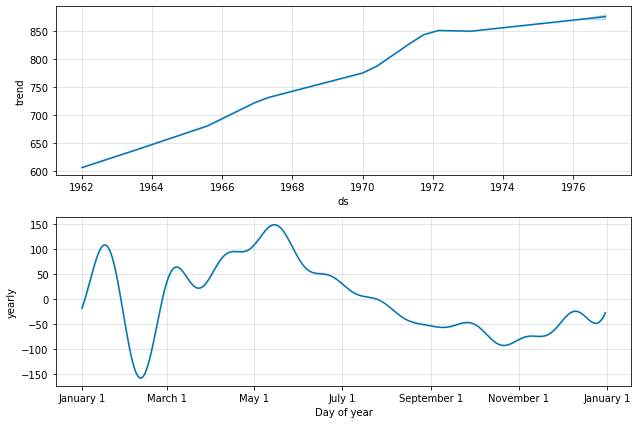

In [19]:
#Checking the Trends in the data
#visualize each components[Trends,weekly]

model.plot_components(pred);

By Default Prophet adds 25 changepoints to the initial 80% of the datasets. 
Let’s plot the vertical lines where the potential changepoints occured.

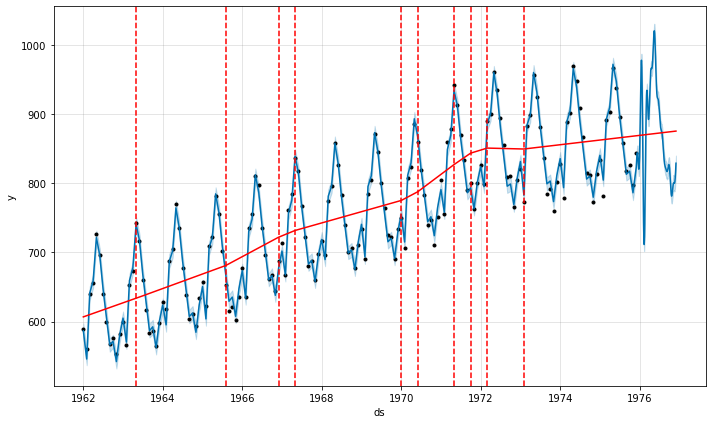

In [20]:
from prophet.plot import add_changepoints_to_plot
fig =model.plot(pred)
a=add_changepoints_to_plot(fig.gca(), model,pred)

Prophet also included cross validation to forecast error using historical data. It tells us the cutoff points in the History of the Data.

In [29]:
#import the library
from prophet.diagnostics import cross_validation,performance_metrics
df_cv = cross_validation(model, period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 21 forecasts with cutoffs between 1965-01-22 01:00:00 and 1974-12-01 01:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01 01:00:00,628.683514,626.895059,630.940027,622.0,1965-01-22 01:00:00
1,1965-03-01 01:00:00,712.487910,705.663045,720.174373,709.0,1965-01-22 01:00:00
2,1965-04-01 01:00:00,734.454372,719.767734,750.694559,722.0,1965-01-22 01:00:00
3,1965-05-01 01:00:00,807.681828,783.854521,834.598713,782.0,1965-01-22 01:00:00
4,1965-06-01 01:00:00,776.832116,742.080725,815.614459,756.0,1965-01-22 01:00:00


In [34]:
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,252.313425,15.884377,12.338791,0.015857,0.013617,0.015842,0.36
1,41 days,250.350211,15.822459,12.259483,0.015792,0.013617,0.015776,0.36
2,42 days,265.579546,16.296611,12.730391,0.016445,0.014349,0.016439,0.36
3,43 days,266.684431,16.330476,12.886922,0.016692,0.014349,0.016691,0.36
4,46 days,252.253193,15.882481,12.551897,0.016230,0.014349,0.016214,0.36


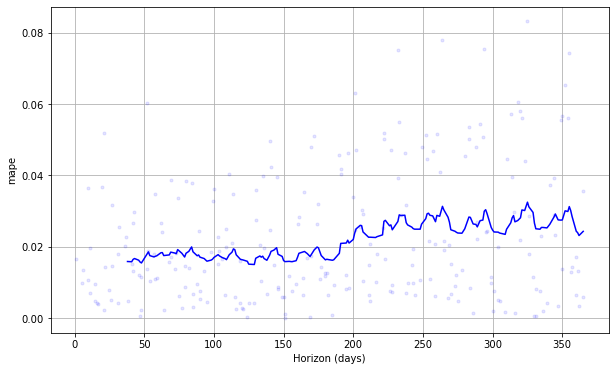

In [39]:
#to visualize the error we will be using the Mean Absolute Percentage Error
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mape')
